# Simple Example 1

## Load libraries

In [1]:
library(bnlearn)
library(gRain)

Loading required package: gRbase


Attaching package: ‘gRbase’


The following objects are masked from ‘package:bnlearn’:

    ancestors, children, nodes, parents




## Graph

In [2]:
g <- empty.graph(nodes=c('X', 'Y', 'Z'))
g <- set.arc(g, from='X', to='Y')
g <- set.arc(g, from='Z', to='Y')

In [3]:
g


  Random/Generated Bayesian network

  model:
   [X][Z][Y|X:Z] 
  nodes:                                 3 
  arcs:                                  2 
    undirected arcs:                     0 
    directed arcs:                       2 
  average markov blanket size:           2.00 
  average neighbourhood size:            1.33 
  average branching factor:              0.67 

  generation algorithm:                  Empty 


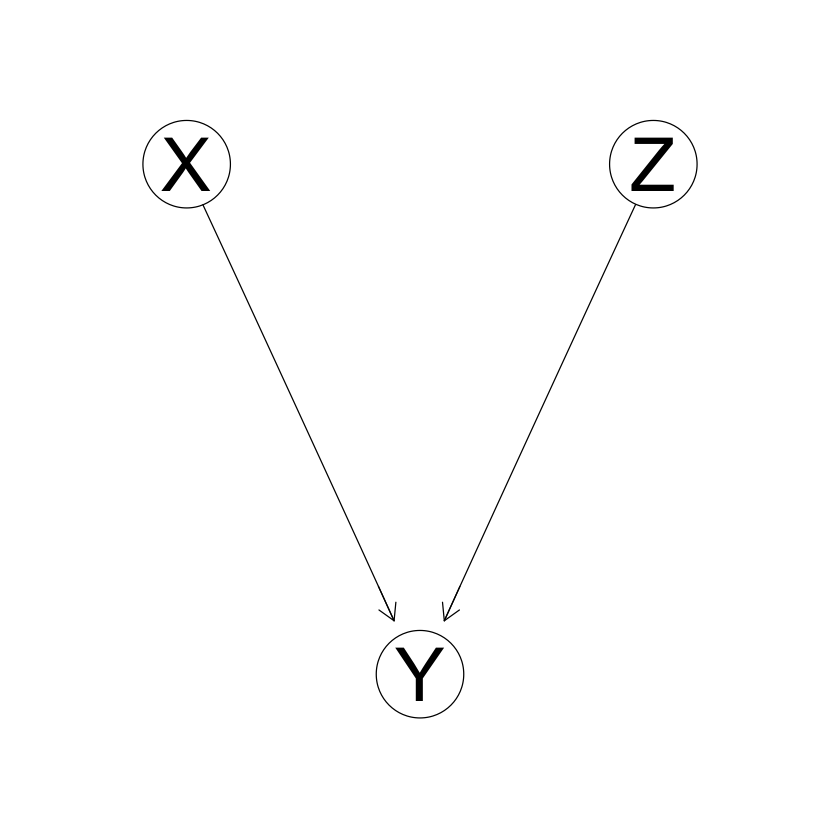

In [4]:
graphviz.plot(g)

## Parameters

In [5]:
X.lv <- c('off', 'on')
Y.lv <- c('off', 'on')
Z.lv <- c('off', 'on')

X.prob <- array(c(0.8, 0.2), dim=2, dimnames=list(X=X.lv))
Y.prob <- array(c(0.8, 0.2, 0.4, 0.6, 0.7, 0.3, 0.9, 0.1), dim=c(2, 2, 2), dimnames=list(Y=Y.lv, X=X.lv, Z=Z.lv))
Z.prob <- array(c(0.8, 0.2), dim=2, dimnames=list(Z=Z.lv))

p <- list(X=X.prob, Y=Y.prob, Z=Z.prob)

## BBN

In [6]:
b <- custom.fit(g, p)

In [7]:
b


  Bayesian network parameters

  Parameters of node X (multinomial distribution)

Conditional probability table:
 X
off  on 
0.8 0.2 

  Parameters of node Y (multinomial distribution)

Conditional probability table:
 
, , Z = off

     X
Y     off  on
  off 0.8 0.4
  on  0.2 0.6

, , Z = on

     X
Y     off  on
  off 0.7 0.9
  on  0.3 0.1


  Parameters of node Z (multinomial distribution)

Conditional probability table:
 Z
off  on 
0.8 0.2 


Warning message:
“Any reference to graphNEL objects will be removed in future versions of gRbase
Please use igraphs instead
”
Warning message:
“Any reference to graphNEL objects will be removed in future versions of gRbase
Please use igraphs instead
”


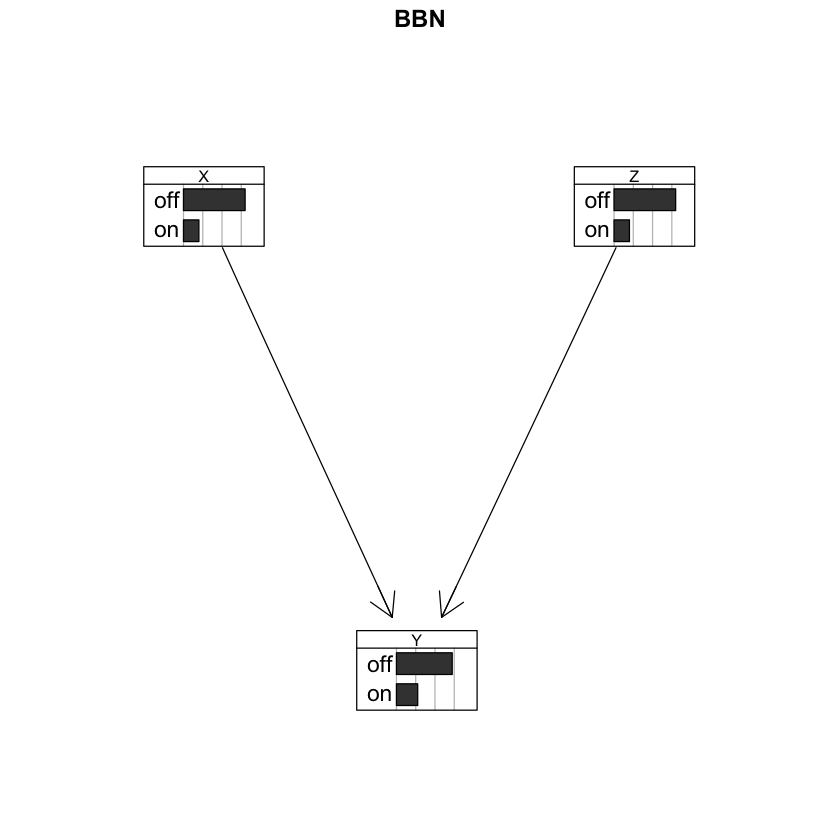

In [8]:
graphviz.chart(b, grid=TRUE, main='BBN')

## Tree

In [9]:
t <- compile(as.grain(b))

Warning message:
“Any reference to graphNEL objects will be removed in future versions of gRbase
Please use igraphs instead
”
Warning message:
“Any reference to graphNEL objects will be removed in future versions of gRbase
Please use igraphs instead
”


## Query

In [10]:
querygrain(t, nodes=c('X', 'Y', 'Z'))

$X
X
off  on 
0.8 0.2 

$Y
Y
  off    on 
0.724 0.276 

$Z
Z
off  on 
0.8 0.2

## Evidence

In [11]:
e <- setEvidence(t, nodes='X', states='on')

In [12]:
querygrain(e, nodes=c('X', 'Y', 'Z'))

$Y
Y
off  on 
0.5 0.5 

$Z
Z
off  on 
0.8 0.2

In [13]:
querygrain(setEvidence(t, nodes='Y', states='on'), nodes=c('X', 'Y', 'Z'))

$X
X
      off        on 
0.6376812 0.3623188 

$Z
Z
      off        on 
0.8115942 0.1884058

In [16]:
querygrain(setEvidence(t, nodes=c('X', 'Y'), states=c('off', 'on')))

$Z
Z
      off        on 
0.7272727 0.2727273